In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

def getYear(date):
    return date.split("-")[0]

In [2]:
# Load initial data into df
df = pd.concat(map(pd.read_csv, ['../data/abstracts_chunk_1.csv', '../data/abstracts_chunk_2.csv', '../data/abstracts_chunk_3.csv', '../data/abstracts_chunk_4.csv', '../data/abstracts_chunk_5.csv', '../data/abstracts_chunk_6.csv', '../data/abstracts_chunk_7.csv', '../data/abstracts_chunk_8.csv', '../data/abstracts_chunk_9.csv', '../data/abstracts_chunk_10.csv', '../data/abstracts_chunk_11.csv']), ignore_index=True)# Display settings
pd.set_option('display.max_columns', 999)
# Drop rows with nan abstracts
df = df.dropna(subset=['abstracts-retrieval-response.coredata.dc:description.abstract.ce:para'])

/Users/neerajmac/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (81,87,91,92) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/neerajmac/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/neerajmac/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (81,87,88,89) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/neerajmac/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (81,87,89,90) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.

In [3]:
# Extract dates
dates = df.loc[:, ["abstracts-retrieval-response.coredata.prism:coverDate"]]

In [4]:
type(dates)

pandas.core.frame.DataFrame

In [5]:
# Gets year
dates['year'] = dates['abstracts-retrieval-response.coredata.prism:coverDate'].apply(lambda date: getYear(date))

In [6]:
abstracts_per_year = dates['year'].value_counts().sort_index()
abstracts_per_year

1963      288
1976     2364
1977     4203
1988    12436
1989    13716
2000     3618
2014    28827
Name: year, dtype: int64

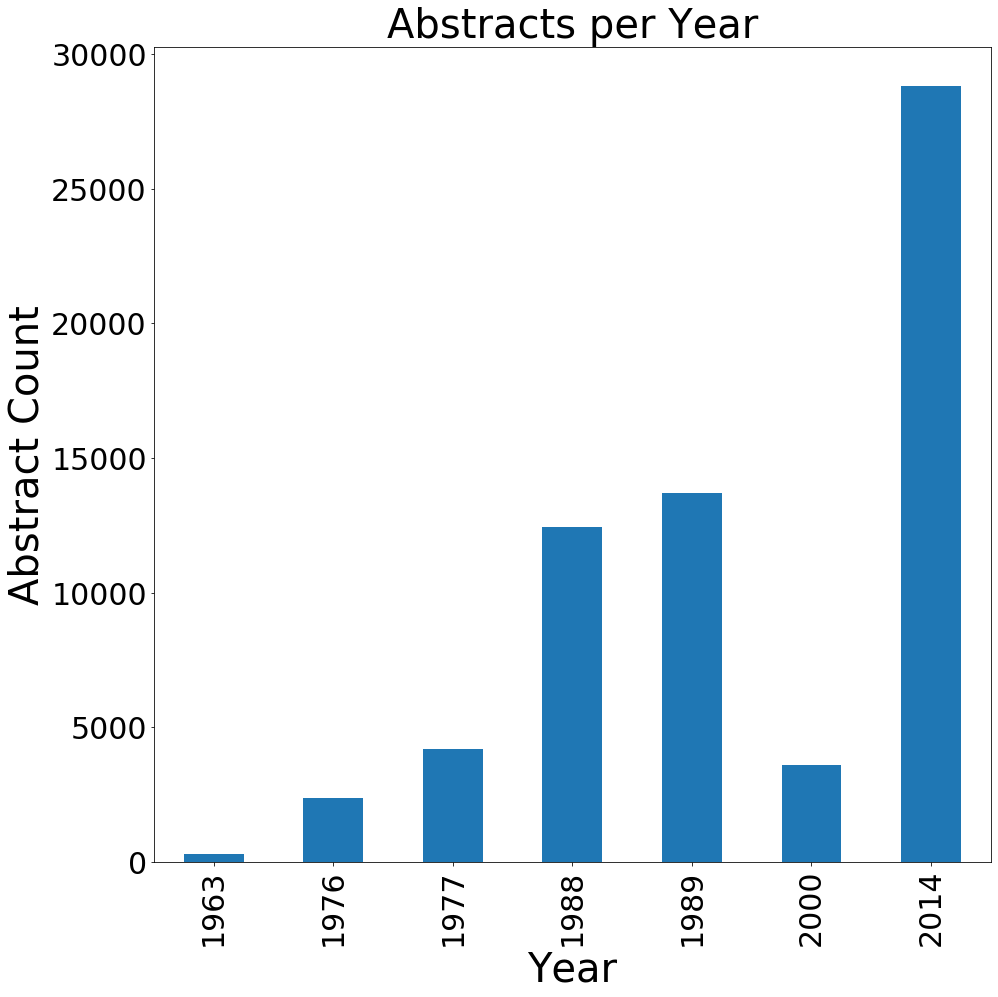

In [7]:
# Params for the notebook
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': '40',
         'axes.titlesize':'40',
         'xtick.labelsize':'30',
         'ytick.labelsize':'30'}

pylab.rcParams.update(params)
fig = plt.figure(figsize = (15, 15)) 

# Plot creation
abstracts_per_year.plot(kind="bar")

# Plot labels
plt.xlabel("Year")
plt.ylabel("Abstract Count")
plt.title("Abstracts per Year")

# Plot specifications
plt.xticks(rotation=90)

# Abstract plot
plt.savefig("../outputs")
plt.show()

# Exports in csv and xlsx
abstracts_per_year.reset_index().to_csv('../outputs/dates.csv')
abstracts_per_year.reset_index().to_excel('../outputs/dates.xlsx')

In [8]:
# Extract all paths
print(['../data/abstracts_chunk_' + str(i) + '.csv' for i in range(1, 12, 1)])

['../data/abstracts_chunk_1.csv', '../data/abstracts_chunk_2.csv', '../data/abstracts_chunk_3.csv', '../data/abstracts_chunk_4.csv', '../data/abstracts_chunk_5.csv', '../data/abstracts_chunk_6.csv', '../data/abstracts_chunk_7.csv', '../data/abstracts_chunk_8.csv', '../data/abstracts_chunk_9.csv', '../data/abstracts_chunk_10.csv', '../data/abstracts_chunk_11.csv']
